# WeatherPy
Last Run on 1/3/2020

## Setup Dependencies and Import Data

In [1]:
# Dependencies and Setup
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

# Import API key from api_keys.py (key is not shared on GitHub)
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) and graphics (PNG)
output_data_file = "../output/cities.csv"
output_lat_temp = "../output/Fig1.png"
output_lat_humudity =  "../output/Fig2.png"
output_lat_cloud =  "../output/Fig3.png"
output_lat_wind =  "../output/Fig4.png"
output_lat_tempN = "../output/Fig5a.png"
output_lat_tempS = "../output/Fig5b.png"
output_lat_humudityN =  "../output/Fig6a.png"
output_lat_humudityS =  "../output/Fig6b.png"
output_lat_cloudN =  "../output/Fig7a.png"
output_lat_cloudS =  "../output/Fig7b.png"
output_lat_windN =  "../output/Fig8a.png"
output_lat_windS =  "../output/Fig8b.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# makes random numbers replicatable, comment out if need
np.random.seed(0)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Number of unique cities selected is {len(cities)}')

Number of unique cities selected is 598


## Perform API Calls
* Limited requests to less than 60 per minute

In [3]:
# Build query url
base_url = "http://api.openweathermap.org/data/2.5/weather"
unit = "imperial"

# Empty list for storing queried data
city_w_data = []
cloudiness_pct = []
countries = []
date_time = []
humidity_pct = []
lat = []
lng = []
max_temp_F = []
wind_mph = []

# Data Retrieval
print("Beginning Data Retrieval\n\
-----------------------------")
for n, city in enumerate(cities):
    print(f"Processing Record {n+1} | {str.title(city)}")
    query_url = f"{base_url}?appid={weather_api_key}&q={city}&units={unit}"
    
    response_json = requests.get(query_url).json()
    
    try:
        # weather data
        max_temp_F.append(response_json['main']['temp_max'])
        humidity_pct.append(response_json['main']['humidity'])
        cloudiness_pct.append(response_json['clouds']['all'])
        wind_mph.append(response_json['wind']['speed'])
        
        # city data
        city_w_data.append(city)
        countries.append(response_json['sys']['country'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        
        # data time stamp
        date_time.append(response_json['dt'])
        
    except KeyError:
        print("City not found. Skipping...")
        
    # Add 1 second intervals between queries to stay within API query limits
    time.sleep(1)

# Inform when retrieval is completed
print("-----------------------------\n\
Data Retrieval Complete\n\
-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Bubaque
Processing Record 2 | Lushunkou
City not found. Skipping...
Processing Record 3 | Arcelia
Processing Record 4 | Wenchi
Processing Record 5 | Samarai
Processing Record 6 | Iranshahr
Processing Record 7 | Kawalu
Processing Record 8 | Tromso
Processing Record 9 | Pevek
Processing Record 10 | Chiredzi
Processing Record 11 | Bethel
Processing Record 12 | Lazaro Cardenas
Processing Record 13 | Sao Filipe
Processing Record 14 | Tumannyy
City not found. Skipping...
Processing Record 15 | Albany
Processing Record 16 | Ushuaia
Processing Record 17 | Busselton
Processing Record 18 | Vanavara
Processing Record 19 | Sept-Iles
Processing Record 20 | Komsomolskiy
Processing Record 21 | Belushya Guba
City not found. Skipping...
Processing Record 22 | Imeni Poliny Osipenko
Processing Record 23 | Tshikapa
Processing Record 24 | Aktash
City not found. Skipping...
Processing Record 25 | Katsuura
Processing Record 26 | Rik

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert data to data frame
df = pd.DataFrame({
    'City': city_w_data,
    'Cloudiness': cloudiness_pct,
    'Country': countries,
    'Date': date_time,
    'Humidity': humidity_pct,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp_F,
    'Wind Speed': wind_mph
})

# Save to csv
df.to_csv(output_data_file, index=False)

In [5]:
# Data count
print('Number of entries with data returned from API')
df.count()

Number of entries with data returned from API


City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [6]:
# Preview data frame
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bubaque,36,GW,1578091256,64,11.28,-15.83,78.94,11.74
1,arcelia,92,MX,1578091258,41,18.32,-100.28,79.56,1.54
2,wenchi,15,GH,1578091259,13,7.74,-2.10,71.26,5.23
3,samarai,59,PG,1578091260,63,-10.62,150.67,86.29,3.13
4,iranshahr,59,IR,1578091261,75,27.21,60.69,60.12,1.01


## Alt: Read data from saved csv file

In [ ]:
#df = pd.read_csv(output_data_file)
#df.head()

## Plotting the Data

#### Latitude vs. Temperature Plot

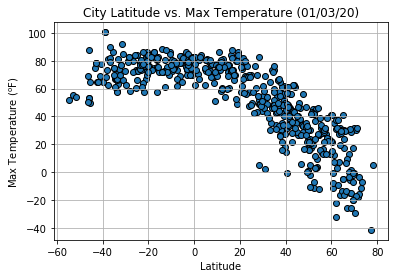

In [7]:
# scatter plot
plt.scatter(df['Lat'], df['Max Temp'], edgecolors='k')
plt.title('City Latitude vs. Max Temperature (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature ($\mathregular{^{o}}$F)')
plt.grid()

# show and save graph
plt.savefig(output_lat_temp)
plt.show()

The code above creates a scatter plot of maximum temperature against latitude using data from 535 countries. It shows temperature decreases towards higher latitudes

#### Latitude vs. Humidity Plot

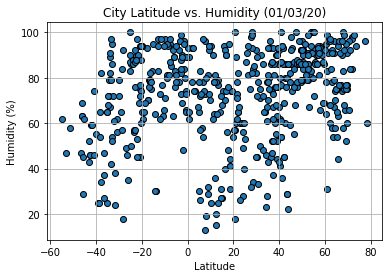

In [8]:
# scatter plot
plt.scatter(df['Lat'], df['Humidity'], edgecolors='k')
plt.title('City Latitude vs. Humidity (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# show and save graph
plt.savefig(output_lat_humudity)
plt.show()

The code above creates a scatter plot of humidity against latitude using data from 535 countries. The spread is large with little correlation between humidity and latitude.

#### Latitude vs. Cloudiness Plot

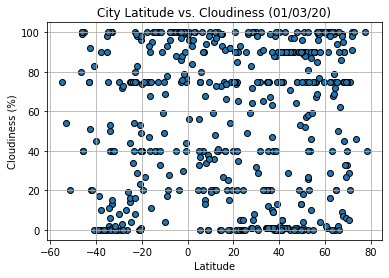

In [9]:
# scatter plot
plt.scatter(df['Lat'], df['Cloudiness'], edgecolors='k')
plt.title('City Latitude vs. Cloudiness (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# show and save graph
plt.savefig(output_lat_cloud)
plt.show()

The code above creates a scatter plot of cloudiness against latitude using data from 535 countries. It shows minimal correlation between cloudiness and latitude

#### Latitude vs. Wind Speed Plot

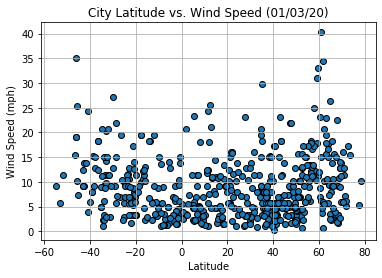

In [10]:
# scatter plot
plt.scatter(df['Lat'], df['Wind Speed'], edgecolors='k')
plt.title('City Latitude vs. Wind Speed (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# show and save graph
plt.savefig(output_lat_wind)
plt.show()

The code above creates a scatter plot of wind speed against latitude using data from 535 countries. It shows minimal correlation between the two parameters

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df.loc[df['Lat']>=0]
df_south = df.loc[df['Lat']<0]
print(f'Northern Hemisphere dataframe has {len(df_north)} countries')
print(f'Southern Hemisphere dataframe has {len(df_south)} countries')

Northern Hemisphere dataframe has 367 countries
Southern Hemisphere dataframe has 168 countries


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

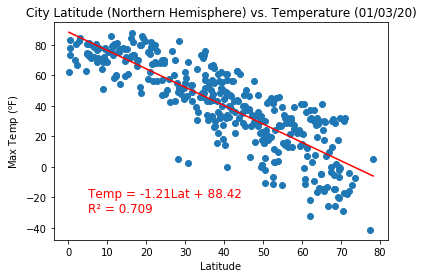

In [12]:
# linear regression on temperature vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_north['Lat'], df_north['Max Temp'])
lat_regress = pd.DataFrame([min(df_north['Lat']),max(df_north['Lat'])])
temp_regress = slope * lat_regress + intercept
line_eq = f'Temp = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_north['Lat'], df_north['Max Temp'])
plt.plot(lat_regress, temp_regress, 'r-')
plt.title('City Latitude (Northern Hemisphere) vs. Temperature (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temp ($\mathregular{^{o}}$F)')
plt.annotate(line_eq, (5, -30), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_tempN)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

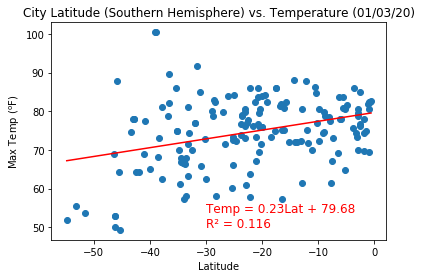

In [13]:
# linear regression on temperature vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_south['Lat'], df_south['Max Temp'])
lat_regress = pd.DataFrame([min(df_south['Lat']),max(df_south['Lat'])])
temp_regress = slope * lat_regress + intercept
line_eq = f'Temp = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_south['Lat'], df_south['Max Temp'])
plt.plot(lat_regress, temp_regress, 'r-')
plt.title('City Latitude (Southern Hemisphere) vs. Temperature (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temp ($\mathregular{^{o}}$F)')
plt.annotate(line_eq, (-30, 50), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_tempS)
plt.show()

Relationship between temperature and latitude:
* Temperature is the lowest at South Pole and North Pole, then generally increases towards the Equator
* It is summer time in southern hemisphere, so the highest temperature are observed there

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

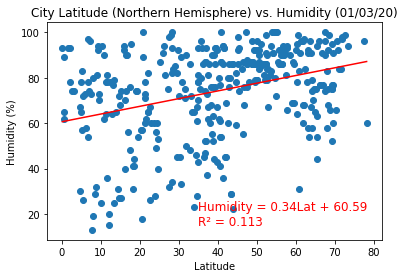

In [14]:
# linear regression on humidity vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_north['Lat'], df_north['Humidity'])
lat_regress = pd.DataFrame([min(df_north['Lat']),max(df_north['Lat'])])
humidity_regress = slope * lat_regress + intercept
line_eq = f'Humidity = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_north['Lat'], df_north['Humidity'])
plt.plot(lat_regress, humidity_regress, 'r-')
plt.title('City Latitude (Northern Hemisphere) vs. Humidity (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (35, 15), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_humudityN)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

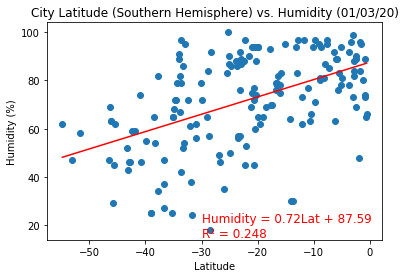

In [15]:
# linear regression on humidity vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_south['Lat'], df_south['Humidity'])
lat_regress = pd.DataFrame([min(df_south['Lat']),max(df_south['Lat'])])
humidity_regress = slope * lat_regress + intercept
line_eq = f'Humidity = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_south['Lat'], df_south['Humidity'])
plt.plot(lat_regress, humidity_regress, 'r-')
plt.title('City Latitude (Southern Hemisphere) vs. Humidity (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-30, 15), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_humudityS)
plt.show()

Relationship between humidity and latitude:
* There is a very weak positive correlation between humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

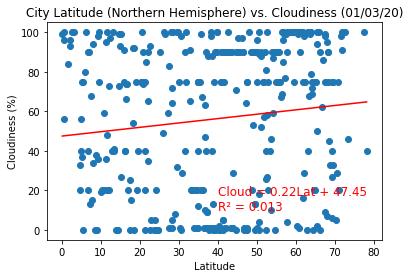

In [16]:
# linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_north['Lat'], df_north['Cloudiness'])
lat_regress = pd.DataFrame([min(df_north['Lat']),max(df_north['Lat'])])
cloud_regress = slope * lat_regress + intercept
line_eq = f'Cloud = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_north['Lat'], df_north['Cloudiness'])
plt.plot(lat_regress, cloud_regress, 'r-')
plt.title('City Latitude (Northern Hemisphere) vs. Cloudiness (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (40, 10), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_cloudN)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

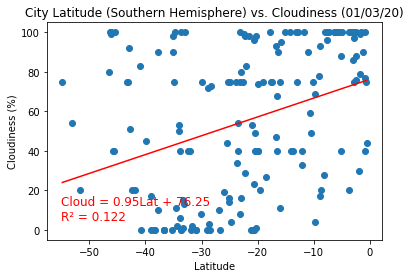

In [17]:
# linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_south['Lat'], df_south['Cloudiness'])
lat_regress = pd.DataFrame([min(df_south['Lat']),max(df_south['Lat'])])
cloud_regress = slope * lat_regress + intercept
line_eq = f'Cloud = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_south['Lat'], df_south['Cloudiness'])
plt.plot(lat_regress, cloud_regress, 'r-')
plt.title('City Latitude (Southern Hemisphere) vs. Cloudiness (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (-55, 5), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_cloudS)
plt.show()

There is no correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

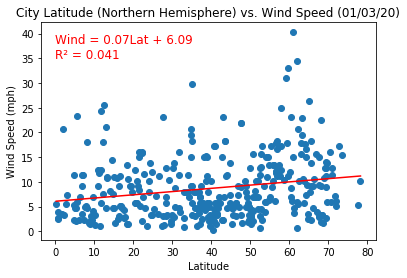

In [18]:
# linear regression on wind speed vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_north['Lat'], df_north['Wind Speed'])
lat_regress = pd.DataFrame([min(df_north['Lat']),max(df_north['Lat'])])
wind_regress = slope * lat_regress + intercept
line_eq = f'Wind = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_north['Lat'], df_north['Wind Speed'])
plt.plot(lat_regress, wind_regress, 'r-')
plt.title('City Latitude (Northern Hemisphere) vs. Wind Speed (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (0, 35), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_windN)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

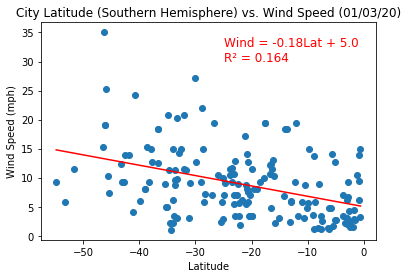

In [19]:
# linear regression on wind speed vs. latitude
(slope, intercept, rvalue, _, _) = linregress(
    df_south['Lat'], df_south['Wind Speed'])
lat_regress = pd.DataFrame([min(df_south['Lat']),max(df_south['Lat'])])
wind_regress = slope * lat_regress + intercept
line_eq = f'Wind = {str(round(slope,2))}Lat + {str(round(intercept,2))}' + \
    f"\nR\xb2 = {round(rvalue ** 2,3)}"

# plot points and regression
plt.scatter(df_south['Lat'], df_south['Wind Speed'])
plt.plot(lat_regress, wind_regress, 'r-')
plt.title('City Latitude (Southern Hemisphere) vs. Wind Speed (' + \
          time.strftime("%m/%d/%y",time.localtime(int(df['Date'][0]))) + \
         ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (-25, 30), fontsize=12, color='r')

# show and save graph
plt.savefig(output_lat_windS)
plt.show()

There is no correlation between wind speed and latitude